In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Project
## Predicting the Introverts from the Extroverts

In [157]:
train=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\train.csv")
test=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\test.csv")
submission=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\sample_submission.csv")

# Data Info

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [159]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [161]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6175 non-null   int64 
 1   Personality  6175 non-null   object
dtypes: int64(1), object(1)
memory usage: 96.6+ KB


In [162]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [163]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [164]:
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [165]:
train.shape

(18524, 9)

In [166]:
test.shape

(6175, 8)

# Data Cleaning & Handling

In [167]:
num_col = train.select_dtypes(include="number")

for col in num_col.columns:
    skew_val = train[col].skew()
    print(f"Skewness of {col}: {round(skew_val, 3)}")


Skewness of id: 0.0
Skewness of Time_spent_Alone: 1.134
Skewness of Social_event_attendance: -0.229
Skewness of Going_outside: -0.367
Skewness of Friends_circle_size: -0.052
Skewness of Post_frequency: -0.059


In [168]:
skew_val = train["Time_spent_Alone"].skew()
print("Skewness:", skew_val)

Skewness: 1.1337770367197073


In [169]:
num_col = train.select_dtypes(include="number")

for col in num_col.columns:
    train[col] = train[col].fillna(train[col].median())

In [170]:
cat_cols = train.select_dtypes(include="object")

for colx in cat_cols.columns:
    train[colx] = train[colx].fillna(train[colx].mode()[0])

In [171]:
# Handle numerical columns
num_col = test.select_dtypes(include="number")

for col in num_col.columns:
    test[col] = test[col].fillna(test[col].median())

# Handle categorical columns
cat_cols = test.select_dtypes(include="object")

for colx in cat_cols.columns:
    test[colx] = test[colx].fillna(test[colx].mode()[0])


In [172]:
train.isna().sum()
test.isna().sum()
train.duplicated().sum()
test.duplicated().sum()

np.int64(0)

# Machine Learning

In [173]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [174]:
cat_cols

,Stage_fear,Drained_after_socializing
0,No,No
1,Yes,Yes
2,No,No
3,No,No
4,Yes,Yes
...,...,...
6170,No,No
6171,Yes,Yes
6172,No,No
6173,No,No


In [175]:
cat_cols = ["Stage_fear", "Drained_after_socializing", "Personality"]

In [176]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
for colm in cat_cols:
    train[colm]=le.fit_transform(train[colm])

In [177]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1,1.0,0,7.0,3.0,0,10.0,8.0,0
2,2,6.0,1,1.0,0.0,0,3.0,0.0,1
3,3,3.0,0,7.0,3.0,0,11.0,5.0,0
4,4,1.0,0,4.0,4.0,0,13.0,5.0,0


Cross-Validation Accuracy Scores: [0.9695 0.9668 0.9668 0.9709 0.9708]
Mean Accuracy: 0.969

Final Accuracy: 0.9709

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



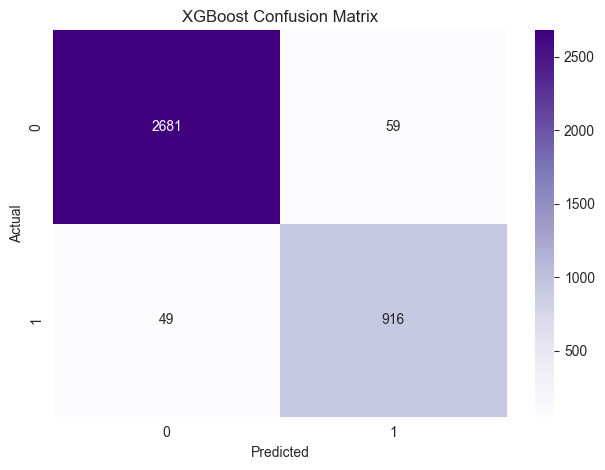

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Features and Target
X = train.drop(columns=["Personality"])
y = train["Personality"]

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Initialize Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define Strong XGBoost Parameters (Tuned)
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Step 5: Evaluate with Cross-Validation
cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Mean Accuracy:", round(cv_scores.mean(), 4))

# Step 6: Train-Test Split for Final Model Training & Evaluation
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 7: Train on Full Training Set
xgb_model.fit(x_train, y_train)

# Step 8: Predict and Evaluate
y_pred = xgb_model.predict(x_test)
print("\nFinal Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


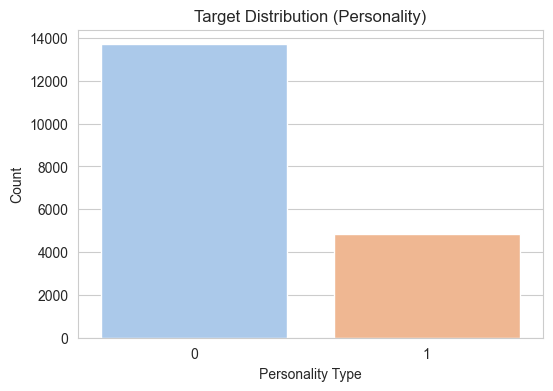

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Personality', palette='pastel')
plt.title('Target Distribution (Personality)')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()


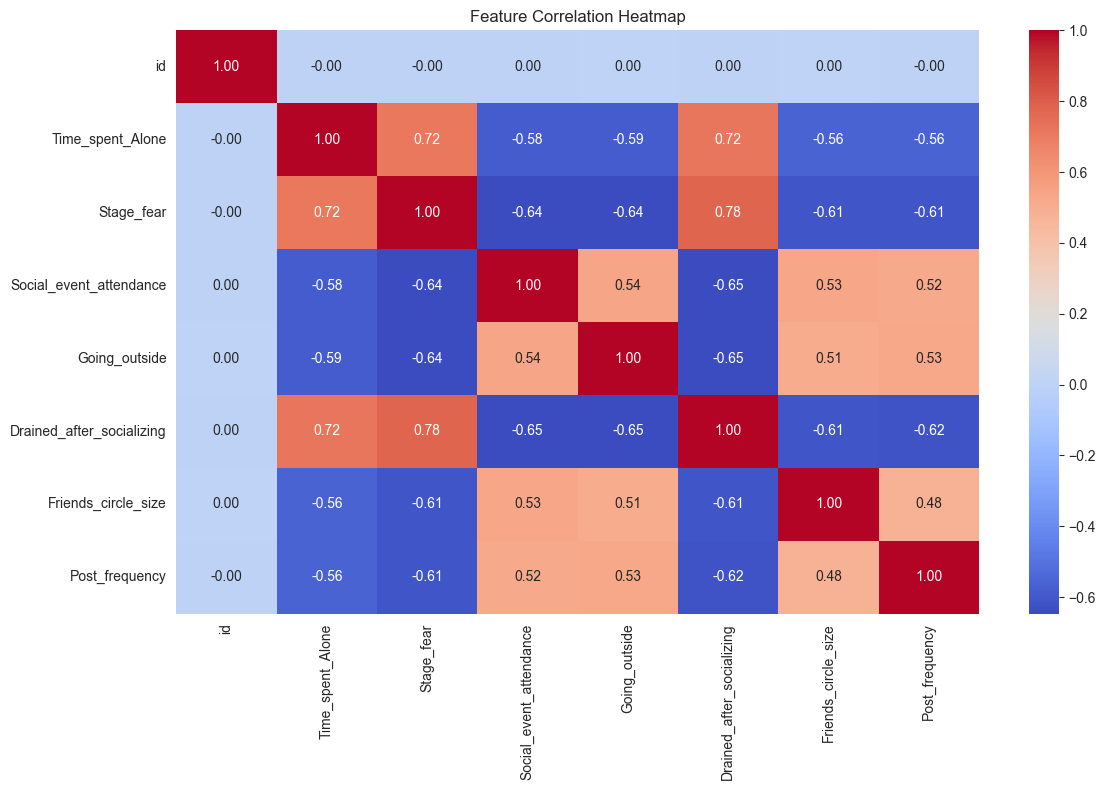

In [180]:
plt.figure(figsize=(12,8))
sns.heatmap(train.drop(columns=['Personality']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


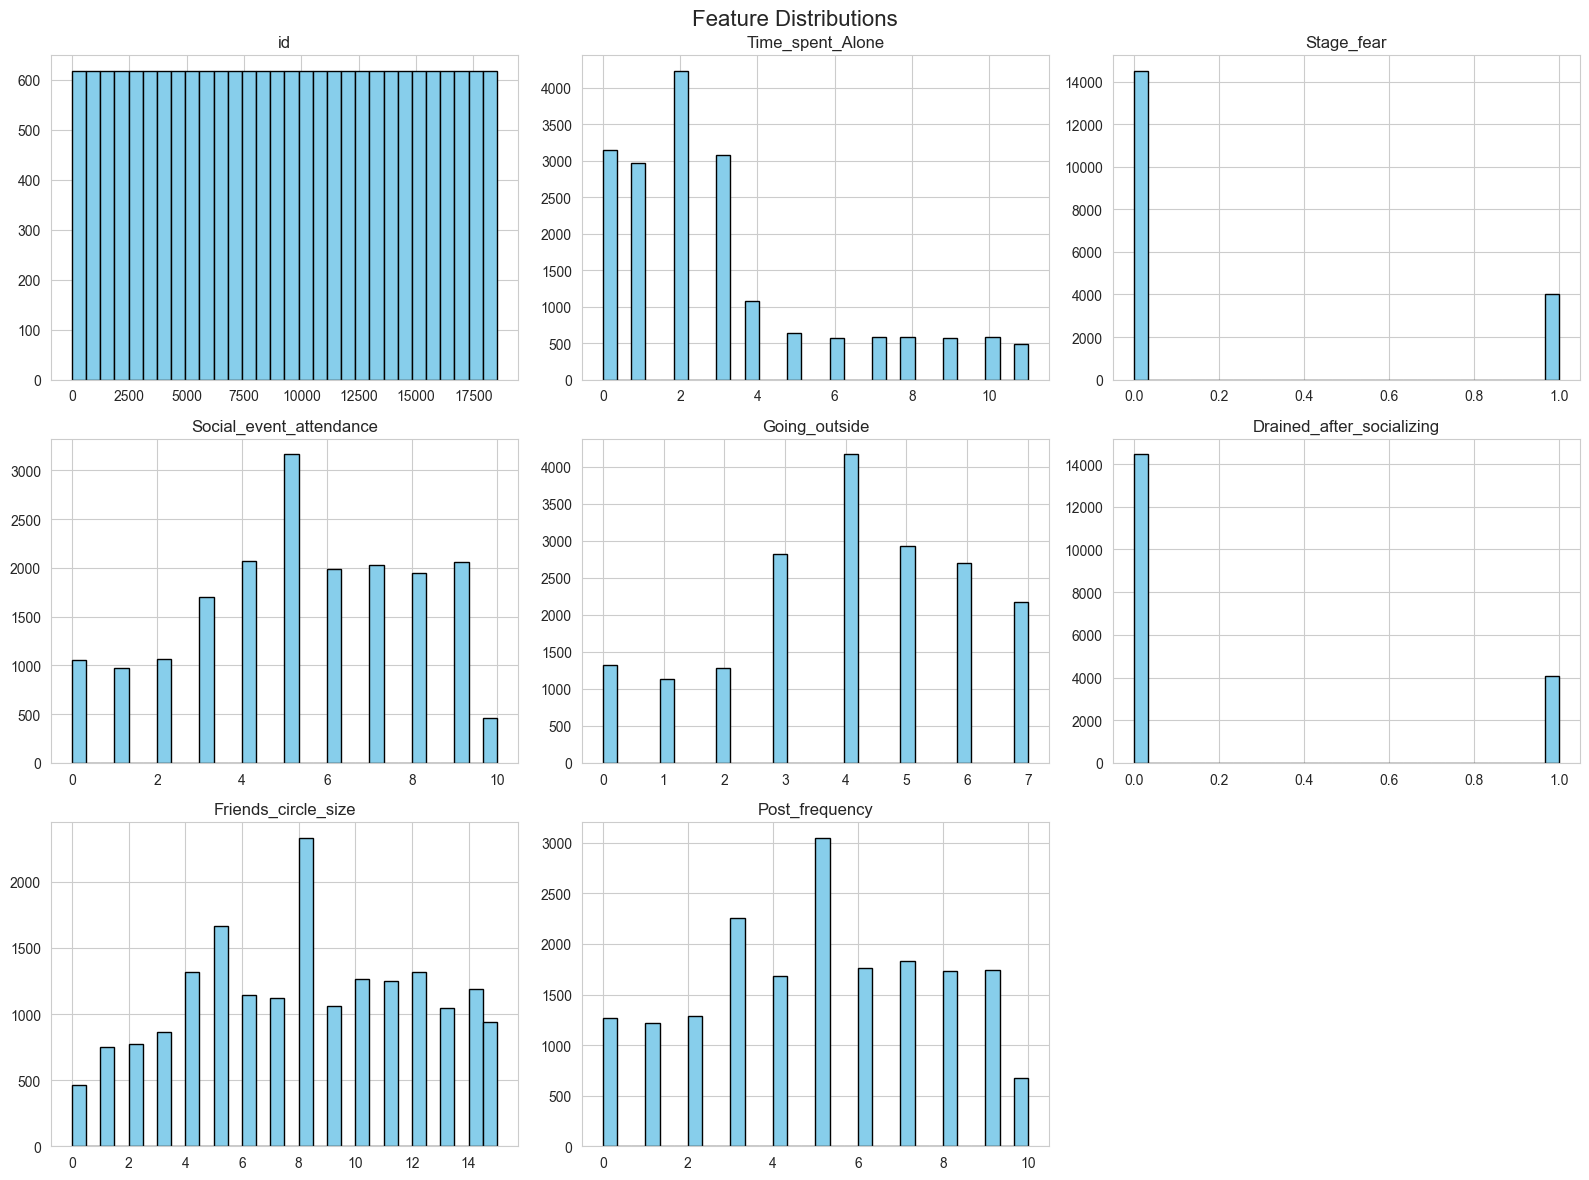

In [181]:
train.drop(columns=['Personality']).hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


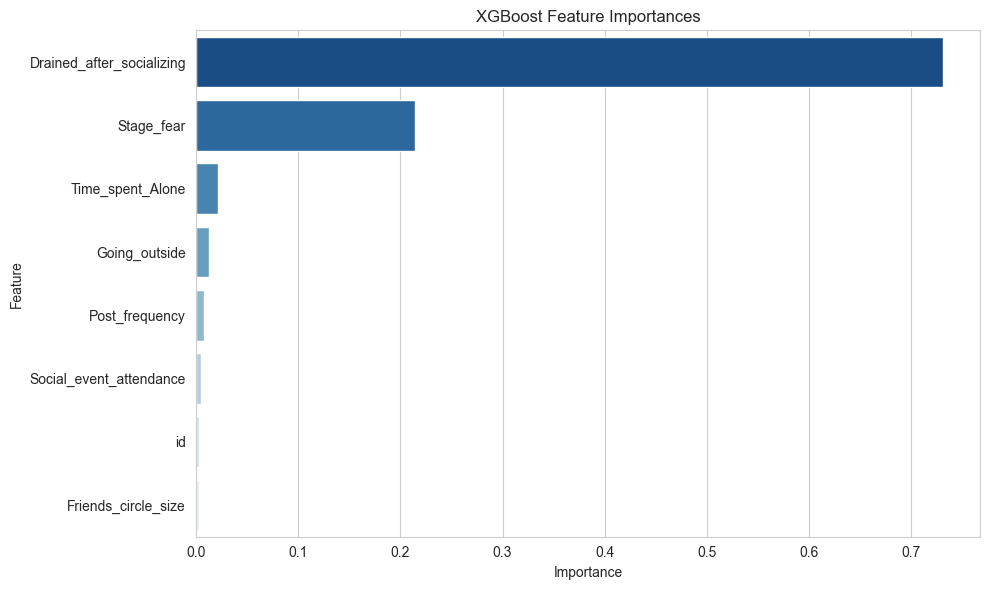

In [182]:
importances = xgb_model.feature_importances_
features = train.drop(columns=['Personality']).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_r')
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


In [183]:
test_cat_cols=test.select_dtypes(include="object")
for colss in test_cat_cols:
    test[colss]=le.fit_transform(test[colss])

In [184]:
# Step 1: Scale the test data
test_df_scaled = scaler.transform(test)

# Step 2: Predict personality labels
prediction = xgb_model.predict(test_df_scaled)

# Step 3: Create submission dataframe
submission_df = pd.DataFrame({
    'id': submission['id'], 
    'Personality': prediction
})

# Step 4: Map numeric predictions to labels
submission_df['Personality'] = submission_df['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

# Step 5: Export to CSV
submission_df.to_csv("my_submission_xg.csv", index=False)
print('✅ Submission CSV saved successfully!')


✅ Submission CSV saved successfully!
